# Исследование объявлений о продаже квартир

Необходимо провести анализ на основе данных о продаже квартир.

## Изучение данных из файла

In [ ]:
import pandas as pd
import os.path, time
import datetime
import re
import warnings

In [ ]:
warnings.simplefilter('ignore')
# Запретил вывод предупреждений.

<div class="alert alert-info"> Запретил вывод предупреждений</div>

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [ ]:
# Разделитель нестандартный, изменил параметры чтения файла.
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Скачал датасет '/datasets/real_estate_data.csv' и записал его в data. Вывел основную информацию и первые 5 строк на экран. Из описания данных известно:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
-ceiling_height — высота потолков (м)
-cityCenters_nearest — расстояние до центра города (м)
-days_exposition — сколько дней было размещено объявление (от публикации до снятия)
-first_day_exposition — дата публикации
-floor — этаж
-floors_total — всего этажей в доме
-is_apartment — апартаменты (булев тип)
-kitchen_area — площадь кухни в квадратных метрах (м²)
-last_price — цена на момент снятия с публикации
-living_area — жилая площадь в квадратных метрах (м²)
-locality_name — название населённого пункта
-open_plan — свободная планировка (булев тип)
-parks_around3000 — число парков в радиусе 3 км
-parks_nearest — расстояние до ближайшего парка (м)
-ponds_around3000 — число водоёмов в радиусе 3 км
-ponds_nearest — расстояние до ближайшего водоёма (м)
-rooms — число комнат
-studio — квартира-студия (булев тип)
-total_area — площадь квартиры в квадратных метрах (м²)
-total_images — число фотографий квартиры в объявлении

В данных есть значительное число пропусков, и некорректные названия.


## Предобработка данных

In [ ]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)
# Привёл столбцы к корректным названиям

In [ ]:
for house in data.loc[data['ceiling_height'].isna(), 'floors_total'].unique():
    mean_height = data.loc[data['floors_total'] == house, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['floors_total'] == house), 'ceiling_height'] = mean_height
    
# Прошёл циклом по всем уникальным значениям количества этажей, для домов где высота потолка неизвестна. 
#Для каждого из этих значений нашёл медиану значение высоты потолка.
#Вписал полученные значения в столбец "высота потолка" для всех значений с соответствующим кол-вом этажей.

In [ ]:
#В столбце "артаменты", пропущенные значения заменяю на False
data.loc[data['is_apartment'].isna(), ['is_apartment']] = False

In [ ]:
#В столбце "балкон", пропущенные значения заменяю на 0
data.loc[data['balcony'].isna(), ['balcony']] = 0

In [ ]:
data.loc[data['parks_around3000'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.55,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.55,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.55,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.55,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.70,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрев на данные, можно заметить что показатели расстояний до водоёмов, парков и аэропорта а так же количество водоёмов и парков часто отсутствуют в одних и тех же строках. Так же в этих строках часто указан мелкий населённый пункт.
Исходя из этого я могу предположить что в небольшом городе эти параметры не указывали потому что "всё и так близко". Поэтому при восстановлении данных я буду считать что парки и водоёмы расположены близко так же как и центр города, а аэропорт наоборот, расположен далеко.

In [ ]:
data.loc[data['parks_nearest'].isna(), 'city_centers_nearest'] = 1000
data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = 1000
data.loc[data['ponds_nearest'].isna(), 'ponds_nearest'] = 1000
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = 1
data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = 1
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = data['airports_nearest'].max()


В строках где нет количества дней размещения я предположил что это обьявление было ещё размещено на дату выгрузки данных. Тогда можно в первом приближении поставить туда разницу между вывешиванием объявления и датой выгрузки данных. Это будет не вполне корректная цифра (объявление ещё не снято) но лучше чем ничего.
Для этого я создал отдельный столбец 'first_day_datetim' где записал дату подачи объявления в формате datetim.

Это предположение достаточно неочевидно, поэтому я на всякий случай сохраню индексы строк где я буду делать замену, чтобы была возможность удалить их в дальнейшем.

In [ ]:
index_time_replacement = list(data.loc[(data['days_exposition'].isna())].index)
index_time_replacement

[0,
 7,
 44,
 45,
 46,
 49,
 52,
 71,
 81,
 84,
 87,
 88,
 101,
 108,
 114,
 122,
 124,
 126,
 127,
 131,
 141,
 151,
 162,
 165,
 167,
 173,
 175,
 176,
 178,
 179,
 181,
 188,
 206,
 207,
 208,
 209,
 215,
 218,
 223,
 226,
 233,
 234,
 238,
 259,
 260,
 261,
 262,
 263,
 270,
 271,
 278,
 279,
 311,
 325,
 328,
 331,
 336,
 342,
 351,
 354,
 359,
 362,
 363,
 369,
 381,
 399,
 422,
 443,
 445,
 446,
 455,
 458,
 496,
 520,
 525,
 536,
 543,
 544,
 563,
 577,
 580,
 581,
 585,
 593,
 595,
 604,
 607,
 616,
 620,
 622,
 630,
 632,
 635,
 638,
 647,
 648,
 674,
 676,
 677,
 691,
 695,
 705,
 756,
 762,
 773,
 778,
 786,
 788,
 790,
 795,
 804,
 806,
 825,
 835,
 852,
 881,
 885,
 891,
 913,
 915,
 923,
 926,
 939,
 945,
 947,
 953,
 957,
 958,
 961,
 977,
 980,
 1005,
 1015,
 1026,
 1035,
 1038,
 1050,
 1071,
 1080,
 1094,
 1102,
 1113,
 1132,
 1137,
 1143,
 1155,
 1157,
 1160,
 1191,
 1192,
 1196,
 1208,
 1218,
 1222,
 1223,
 1240,
 1249,
 1253,
 1254,
 1257,
 1259,
 1263,
 1265,
 126

In [ ]:
data['first_day_datetim'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Создаю столбец с датой в правильном формате.

In [ ]:
t_x = time.ctime(os.path.getctime('/datasets/real_estate_data.csv')) # дата создания файла
t_x

'Thu Mar 19 12:41:41 2020'

In [ ]:
for first_date in data.loc[data['days_exposition'].isna(), 'first_day_datetim'].unique():
    t_delt = (pd.to_datetime(t_x) - first_date).days
    data.loc[(data['days_exposition'].isna()) & (data['first_day_datetim'] == first_date), 'days_exposition'] = t_delt
# Прошёл циклом по всем уникальным значениям даты подачи, для строк где дни размещения неизвестны. 
#Для каждого из этих значений нашёл разницу между датой подачи и датой выгрузки.
#Вписал полученные значения в столбец "количество дней размещения" для всех значений с соответствующей датой подачи.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23621 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
city_centers_nearest    23698 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around300

Остальные значения восстановить невозможно, поэтому строки с ними можно удалить.

In [ ]:
data = data.dropna()

# data.dropna(inplace=True) старый вариант

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20903 entries, 0 to 23698
Data columns (total 23 columns):
total_images            20903 non-null int64
last_price              20903 non-null float64
total_area              20903 non-null float64
first_day_exposition    20903 non-null object
rooms                   20903 non-null int64
ceiling_height          20903 non-null float64
floors_total            20903 non-null float64
living_area             20903 non-null float64
floor                   20903 non-null int64
is_apartment            20903 non-null bool
studio                  20903 non-null bool
open_plan               20903 non-null bool
kitchen_area            20903 non-null float64
balcony                 20903 non-null float64
locality_name           20903 non-null object
airports_nearest        20903 non-null float64
city_centers_nearest    20903 non-null float64
parks_around3000        20903 non-null float64
parks_nearest           20903 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_datetim
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,378.0,2019-03-07
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,1000.0,0.0,1000.0,0.0,1000.0,81.0,2018-12-04
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015-08-20
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018-06-19
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,...,0.0,городской посёлок Янино-1,84869.0,1000.0,1.0,1000.0,1.0,1000.0,55.0,2018-09-10


In [ ]:
sum(data.duplicated())
# Сделал автоматическую проверку на дубликаты.

0

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

In [ ]:
for locality in data['locality_name'].unique():
    i = re.search('[А-ЯЁ]', locality).start()
    data.loc[(data['locality_name'] == locality), 'locality_name'] = locality[i:]
#    Удалил названия населённых пунктов чтобы избежать разночтений и соответственно дубликатов


In [ ]:
sorted(data['locality_name'].unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Калитино',
 'Каложицы',
 'Кальтино',


### Вывод

Провёл предобработку данных. Привёл названия столбцов к единообразному виду. Для отсутствующих значений для которых можно было сделать предположения и восстановить по соседним данным  произвёл замену. Для тех значений где предположения сделать нельзя удалил строки. Проверил на наличие дубликатов.
Удалено около 3 тыс строк или около 11% информации.
В результате получил таблицу с количеством строк 20903, без пропусков и дубликатов.

## Расчёты и добавление результатов в таблицу

In [ ]:
# Привёл к целым числам те значения где дробную часть можно отбросить. 
data[['last_price', 'floors_total', 'balcony', 'airports_nearest',
      'city_centers_nearest', 'parks_around3000', 'parks_nearest',
      'ponds_around3000', 'ponds_nearest', 'days_exposition']] = data[['last_price', 'floors_total', 'balcony', 'airports_nearest',
      'city_centers_nearest', 'parks_around3000', 'parks_nearest',
      'ponds_around3000', 'ponds_nearest', 'days_exposition']].astype('int')

In [ ]:
# Удалил столбец 'first_day_exposition' потому что аналогичный столбец с датами уже создал ранее.
data = data.drop(columns = 'first_day_exposition')

#data.drop(columns = 'first_day_exposition', inplace=True ) Старый вариант

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20903 entries, 0 to 23698
Data columns (total 22 columns):
total_images            20903 non-null int64
last_price              20903 non-null int64
total_area              20903 non-null float64
rooms                   20903 non-null int64
ceiling_height          20903 non-null float64
floors_total            20903 non-null int64
living_area             20903 non-null float64
floor                   20903 non-null int64
is_apartment            20903 non-null bool
studio                  20903 non-null bool
open_plan               20903 non-null bool
kitchen_area            20903 non-null float64
balcony                 20903 non-null int64
locality_name           20903 non-null object
airports_nearest        20903 non-null int64
city_centers_nearest    20903 non-null int64
parks_around3000        20903 non-null int64
parks_nearest           20903 non-null int64
ponds_around3000        20903 non-null int64
ponds_nearest           20903 

In [ ]:
data['price_meter_sq'] = (data['last_price'] / data['total_area']).astype('int') 
# Посчитал цену за квадратный метр.

In [ ]:
data['first_day_of_week'] = data['first_day_datetim'].dt.weekday
data['first_day_month'] = data['first_day_datetim'].dt.month
data['first_day_year'] = data['first_day_datetim'].dt.year
# Выделил отдельные столбцы для дня недели, месяца и года подачи объявления.

In [ ]:
def floor_type_func(row):
    """
Функция определяет тип этажности (первый, последний, другой, одноэтажный дом)
    """
    if row['floors_total'] == 1:
        return "одноэтажный дом"    
    elif row['floor'] == row['floors_total']:
        return 'последний' 
    elif (row['floor'] == 1):
        return 'первый'
    else:
        return 'другой'
    

Для того чтобы получилось различить одноэтажный дом и первый этаж многоэтажки ввёл тип "одноэтажный дом".

In [ ]:
data['floor_type'] = data.apply(floor_type_func, axis=1)
# Добавил столбец с типом этажа.

In [ ]:
data['total_in_living_area'] = data['living_area'] / data['total_area'] 
data['total_in_kitchen_area'] = data['kitchen_area'] / data['total_area']
# Добавил столбцы с отношением жилой площади с общей площадью и площади кухни с общей площадью

In [ ]:
data.head()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_nearest,days_exposition,first_day_datetim,price_meter_sq,first_day_of_week,first_day_month,first_day_year,floor_type,total_in_living_area,total_in_kitchen_area
0,20,13000000,108.0,3,2.70,16,51.0,8,False,False,...,755,378,2019-03-07,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,1,2.75,11,18.6,1,False,False,...,1000,81,2018-12-04,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2,2.55,5,34.3,4,False,False,...,574,558,2015-08-20,92785,3,8,2015,другой,0.612500,0.148214
4,2,10000000,100.0,2,3.03,14,32.0,13,False,False,...,48,121,2018-06-19,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.4,1,2.65,12,14.4,5,False,False,...,1000,55,2018-09-10,95065,0,9,2018,другой,0.473684,0.299342


### Вывод
Добавил данные необходимые для дальнейшего анализа. 

## Исследовательский анализ данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5a2e9ea90>,
      dtype=object)

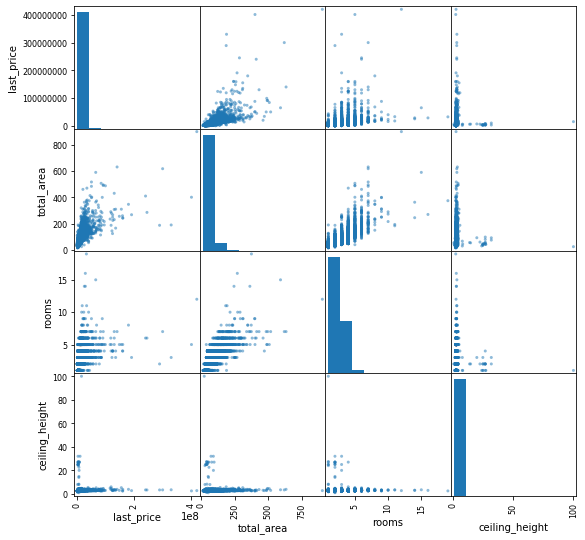

In [ ]:
new = data[['last_price', 'total_area', 'rooms', 'ceiling_height']]
new.corr()

pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'rooms', 'ceiling_height']], figsize=(9, 9))

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter_sq,first_day_of_week,first_day_month,first_day_year,total_in_living_area,total_in_kitchen_area
count,20903.000000,2.090300e+04,20903.000000,20903.000000,20903.000000,20903.000000,20903.000000,20903.000000,20903.000000,20903.000000,...,20903.000000,20903.000000,20903.000000,20903.000000,2.090300e+04,20903.000000,20903.000000,20903.000000,20903.000000,20903.000000
mean,10.093958,6.502904e+06,60.506442,2.095202,2.733267,10.560015,34.632033,5.835382,10.508898,0.619911,...,822.636846,0.815768,814.809358,234.708511,9.919414e+04,2.547242,6.423528,2017.354351,0.562640,0.186955
std,5.675124,9.603942e+06,34.490472,1.064797,1.002996,6.516918,21.931981,4.810208,5.841716,0.970456,...,314.434461,0.832938,290.456312,265.904120,4.812391e+04,1.782514,3.467867,1.043782,0.103616,0.072598
min,0.000000,1.219000e+04,14.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.500000e+06,40.500000,1.000000,2.550000,5.000000,18.800000,2.000000,7.000000,0.000000,...,591.000000,0.000000,638.000000,48.000000,7.692300e+04,1.000000,3.000000,2017.000000,0.493506,0.133333
50%,10.000000,4.700000e+06,52.100000,2.000000,2.650000,9.000000,30.080000,4.000000,9.000000,0.000000,...,1000.000000,1.000000,1000.000000,133.000000,9.491800e+04,2.000000,6.000000,2017.000000,0.566667,0.171875
75%,14.000000,6.800000e+06,70.000000,3.000000,2.750000,15.000000,42.500000,8.000000,12.000000,1.000000,...,1000.000000,1.000000,1000.000000,348.000000,1.137610e+05,4.000000,10.000000,2018.000000,0.635401,0.231223
max,50.000000,4.200000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1939.000000,1.736842e+06,6.000000,12.000000,2019.000000,0.975754,0.787879


По диаграммам можно сказать что все четыре параметра страдают от выбросов и максимальные значения сильно смещены, так что в диаграммах виден только  один столбец (кроме параметра "количество комнат", там ситуация лучше и видно три столбца)
Предварительно можно сказать что между параметрами "площадь" и "цена" есть достаточно сильная корреляция (в области больших значений она менее выражена, возможно из-за выбросов). Так же корреляция (менее заметная) есть между количеством комнат и ценой.

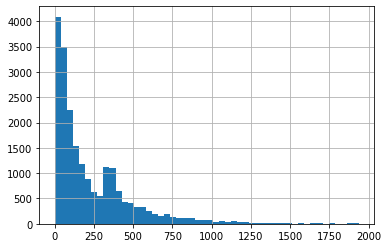

In [ ]:
data['days_exposition'].hist(bins=50)

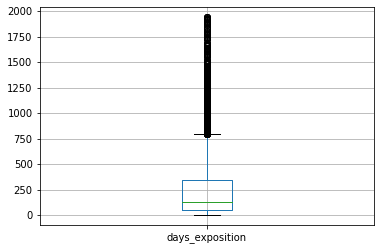

In [ ]:
data[['days_exposition']].boxplot()

In [ ]:
print('Медиана:', data['days_exposition'].median(), 'среднее:', data['days_exposition'].mean())

Медиана: 133.0 среднее: 234.70851074008516


По гистограмме и графику распределения можно сделать вывод что есть два типа значений - неправдоподобные и малочисленные. Неправдоподобные - которые убирались в тот же день, малочисленные - с очень большим сроком продажи. Поэтому я принял решение удалить значения где срок прождажи равен нулю и где срок продажи больше 1000.

In [ ]:
cleared_data = data.query('days_exposition < 1000 and days_exposition != 0')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb593e882d0>]],
      dtype=object)

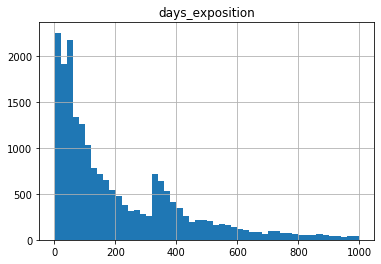

In [ ]:
cleared_data.hist('days_exposition', bins=50)

In [ ]:
print('Медиана:', cleared_data['days_exposition'].median(), 'среднее:', 
      cleared_data['days_exposition'].mean(), 'отброшено:', len(data) - len(cleared_data))

Медиана: 126.0 среднее: 210.66244188891608 отброшено: 468


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb593d90850>]],
      dtype=object)

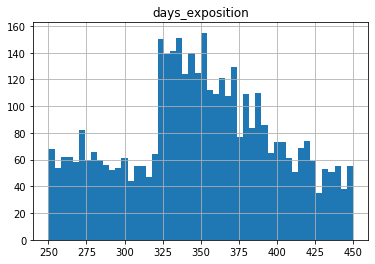

In [ ]:
cleared_data.hist('days_exposition', range = (250, 450), bins=50)

Среднее значение и медиана стали немного ближе друг к другу, данные стали более равномерными. Отброшено сравнительно немного значений. 
Интерес представляет пик в районе между 200 и 400 днями, . Возможно, идея заменять отсутствующие значения времени размещения была не слишком удачной.

Нужно посмотреть, что будет если удалить те значения которые я заменил. Для этого воспользуюсь командой .drop и передам туда значение индексов из index_time_replacement с параметром errors = 'ignore' на случай если при обработке данных я удалил некоторые строки с индексами входящими в этот список. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb593d32c50>]],
      dtype=object)

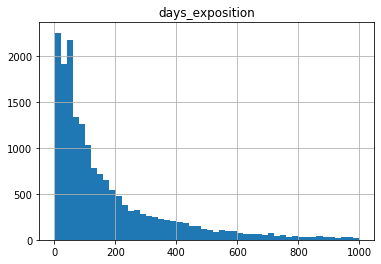

In [ ]:
cleared_data.drop(labels = index_time_replacement, axis = 0, errors = 'ignore').hist('days_exposition', bins=50)

После отбрасывания заменённых данных гистограмма стала похожа на классическое распределение Пуассона.
Но нужно обратить внимание, данные вызывавшие выбросы сами были похожи на распределение Пуассона, просто со сдвигом по дате. Это может значить что моя идея о том что срок обьявления можно посчитать из разницы времени подачи и времени выгрузки файла в принципе верна, просто дата создания файла с которым я работаю отличается от времени выгрузки. На графике пик начинается с времени примерно равному 315 - 320 дней.

In [ ]:
data['first_day_datetim'].max()

Timestamp('2019-05-03 00:00:00')

In [ ]:
delta_time = (pd.to_datetime(t_x) - data['first_day_datetim'].max()).days
delta_time

321

Проверил максимальную дату подачи обьявления. Да, разница будет чуть меньше года, соответственно правильную замену можно сделать если уменьшить в строках index_time число дней размещения на 322.

In [ ]:
err = 0
for index_repl in index_time_replacement:
    try:
        cleared_data.loc[index_repl, 'days_exposition'] -= 322
    except:
        err += 1
print(err)

515


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb593cbeb50>]],
      dtype=object)

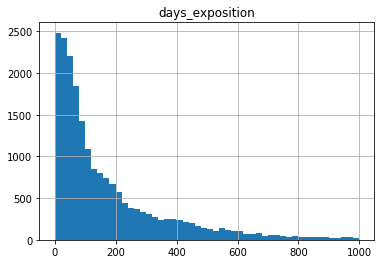

In [ ]:
cleared_data.hist('days_exposition', bins=50)

График похож на распределение Пуассона, действия были верны.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb593abe610>]],
      dtype=object)

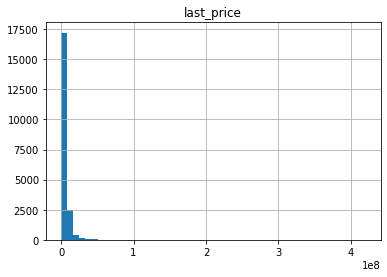

In [ ]:
cleared_data.hist('last_price', bins=50)

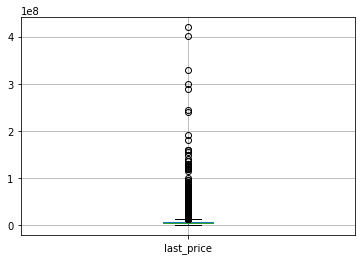

In [ ]:
data[['last_price']].boxplot()

Выбросы очень большие. С ценой трудно определить, какая максимальная цена правдоподобна, но для того чтобы отдельные сверхвысокие значения не портили картину я решил убрать все значения больше 50 млн.

In [ ]:
cleared_data = cleared_data.query('last_price < 50000000')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb593907610>]],
      dtype=object)

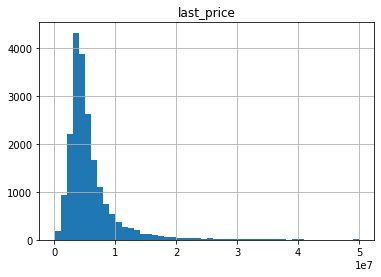

In [ ]:
cleared_data.hist('last_price', bins=50)

In [ ]:
print('Медиана:', cleared_data['last_price'].median(), 'среднее:', 
      cleared_data['last_price'].mean())

Медиана: 4650000.0 среднее: 5924583.416547789


Гистограмма похожа на распределение Пуассона. Можно сделать вывод что данные почищены корректно.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb59380acd0>]],
      dtype=object)

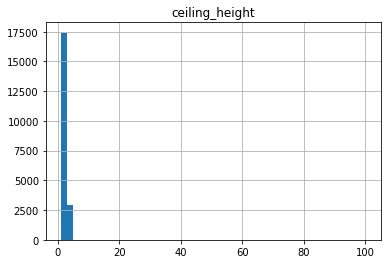

In [ ]:
cleared_data.hist('ceiling_height', bins=50)


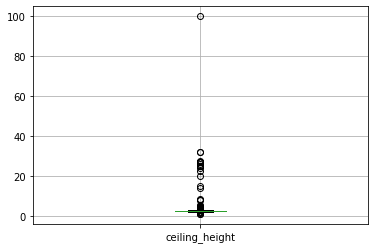

In [ ]:
cleared_data[['ceiling_height']].boxplot()

В параметре "высота потолков" тоже много очень больших неправдоподобных параметров. Ограничим высоту величиной между 2 и 4 м.

In [ ]:
cleared_data = data.query('ceiling_height < 4 and ceiling_height > 2')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5936cb150>]],
      dtype=object)

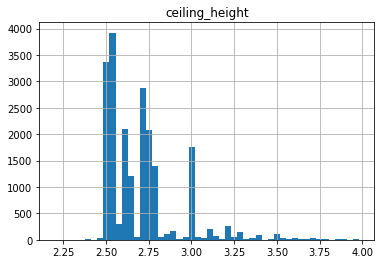

In [ ]:
cleared_data.hist('ceiling_height', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5a25c5d50>]],
      dtype=object)

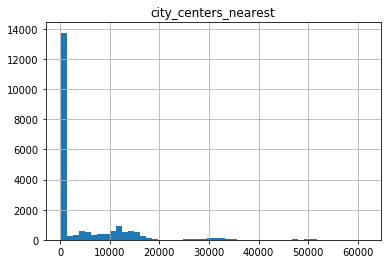

In [ ]:
cleared_data.hist('city_centers_nearest', bins=50)

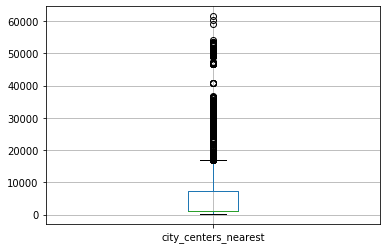

In [ ]:
cleared_data[['city_centers_nearest']].boxplot()

В параметре "расстояние до центра" много очень больших величин. Даже если принять что в небольших сельских поселениях брали расстояние до центра соседнего города, всё равно значения 60 км выглядят неправдоподобно. Ограничим этот параметр величиной 20000м.

In [ ]:
cleared_data = cleared_data.query('city_centers_nearest < 20000')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb59346f490>]],
      dtype=object)

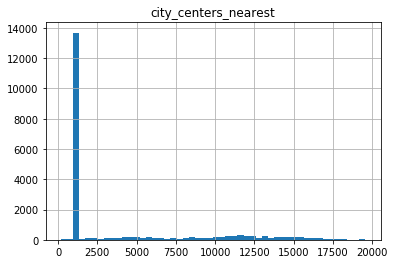

In [ ]:
cleared_data.hist('city_centers_nearest', bins=50)

После удаления значений расстояния от центра более 20 км, у нас всё ещё осталось некоторое количество значений. Можно предположить что это сельские поселения, так что дальнейшее отбрасывание считаю не целесообразным.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5933648d0>]],
      dtype=object)

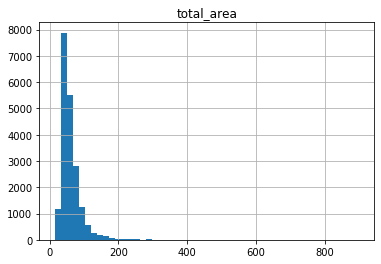

In [ ]:
cleared_data.hist('total_area', bins=50)

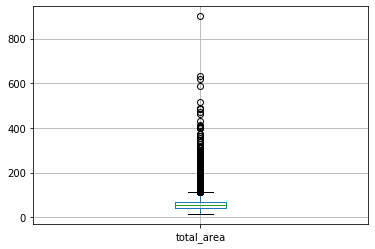

In [ ]:
cleared_data[['total_area']].boxplot()

У площади квартиры тоже много выбросов. Сложно сказать, связано это с ошибками или с особенностями рынка недвижимости. В любом случае чтобы не смещались показатели выбивающиеся значения нужно удалить.

In [ ]:
cleared_data = cleared_data.query('total_area < 150')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5931d5e90>]],
      dtype=object)

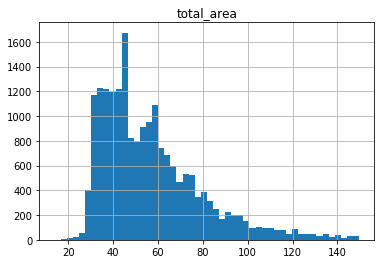

In [ ]:
cleared_data.hist('total_area', bins=50)

Удалил малочисленные значения у показателя площади.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5a2e59250>]],
      dtype=object)

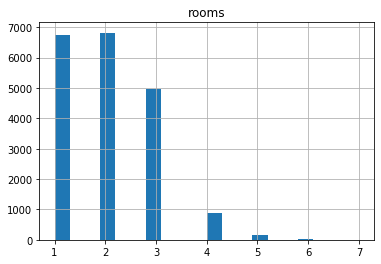

In [ ]:
cleared_data.hist('rooms', bins=20)

Проблем в количестве комнат не обнаружил.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb593062bd0>,
      dtype=object)

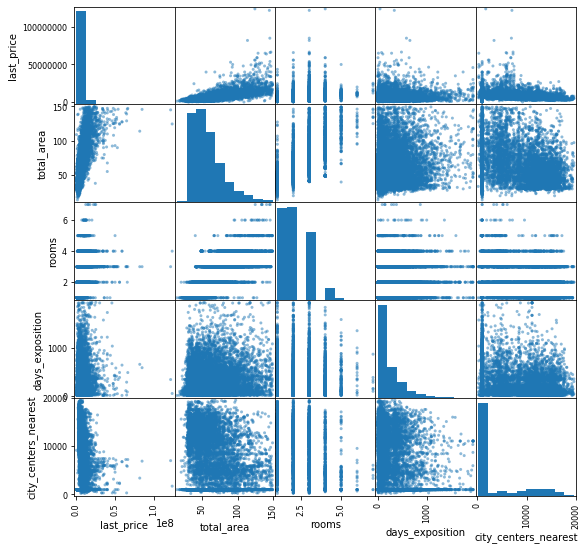

In [ ]:
pd.plotting.scatter_matrix(cleared_data[['last_price', 'total_area',
                                 'rooms', 'days_exposition', 'city_centers_nearest']], figsize=(9, 9))

Проверил зависимость цены от  площади, числа комнат, удалённости от центра. Самая чёткая корреляция цены и площади, остальные выражены слабее.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb592856bd0>,
      dtype=object)

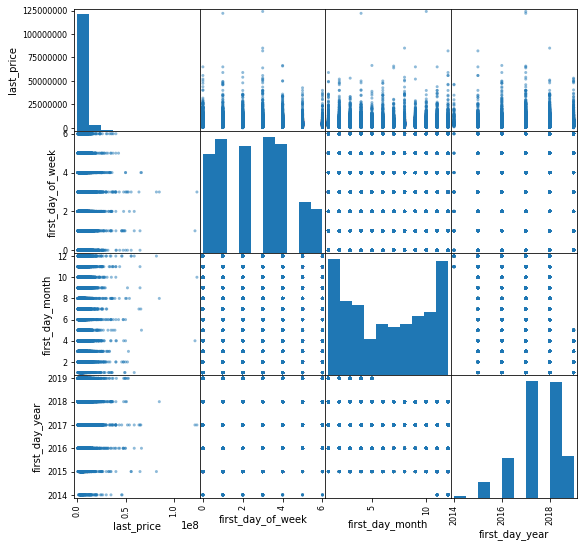

In [ ]:
pd.plotting.scatter_matrix(cleared_data[['last_price', 'first_day_of_week',
                                 'first_day_month', 'first_day_year']], figsize=(9, 9))

Проверил зависимость цены от даты размещения: дня недели, месяца и года. Единственное что можно определить - слабая зависимость цены от года размещения что может быть связано с инфляцией.

In [ ]:
cleared_data.groupby('floor_type')['last_price'].mean()

floor_type
другой             6.021523e+06
одноэтажный дом    2.913056e+06
первый             4.510647e+06
последний          5.318664e+06
Name: last_price, dtype: float64

Проверил зависимость цены от этажа. На первом этаже средняя цена сильно меньше чем на верхнем и в середине. В середине цена немного выше чем на последнем. Самая низкая цена у одноэтажных домов, возможно это связано с тем что большинство из них находятся в сельских поселениях.

In [ ]:
first_ten_cities = cleared_data.groupby(['locality_name'])['price_meter_sq'].agg(['count',
                                                               'mean']).sort_values(by=['count'], ascending = False).head(10)
first_ten_cities.sort_values(by=['mean'], ascending = False)

,count,mean
locality_name,,
Санкт-Петербург,13468,111476.811034
Пушкин,137,100078.306569
Кудрово,375,95270.568000
Парголово,288,90755.586806
Мурино,458,85795.318777
Шушары,392,78393.239796
Колпино,195,74843.512821
Всеволожск,355,69048.630986
Гатчина,289,68691.411765


Выделил первые десять городов по количеству обьявлений. Самая большая средняя цена за метр квадратный в Питере, самая маленькая в Выборга.

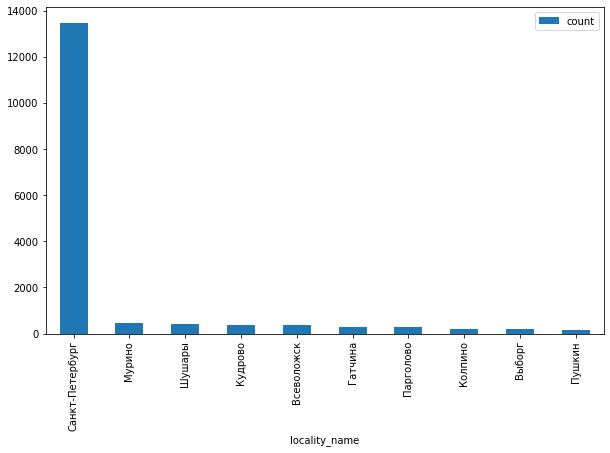

In [ ]:
first_ten_cities.reset_index().plot(x = "locality_name", y="count", kind="bar", figsize=(10, 6))

In [ ]:
spb_data =  cleared_data[ cleared_data['locality_name'] == 'Санкт-Петербург']

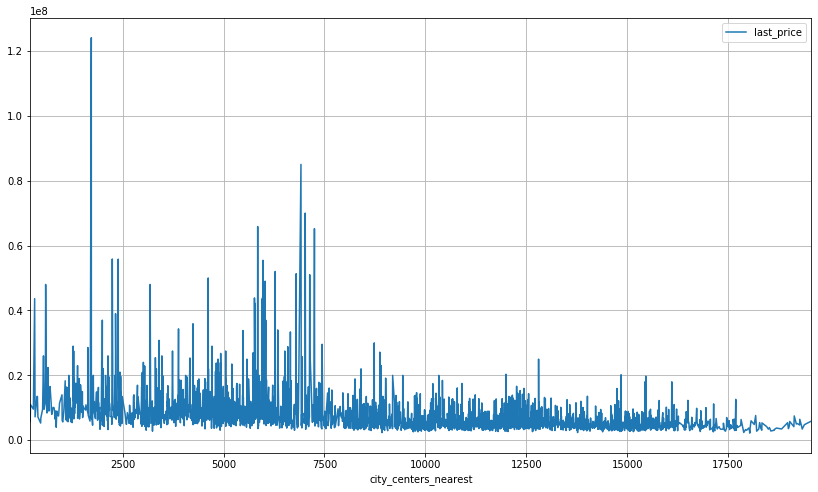

In [ ]:
cleared_data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest',
                                                                     values='last_price').plot(grid=True, figsize=(14, 8))

Построил график зависимости средней цены за метр квадратный и расстояния от центра. Сильных изменений на графике не вижу, но можно сказать что картина немного меняется после 7500 м, будем считать этот радиус центром.

In [ ]:
spb_data_centr =  cleared_data[(cleared_data['locality_name'] == 'Санкт-Петербург') & (cleared_data['city_centers_nearest'] < 7500)]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5921aa790>,
      dtype=object)

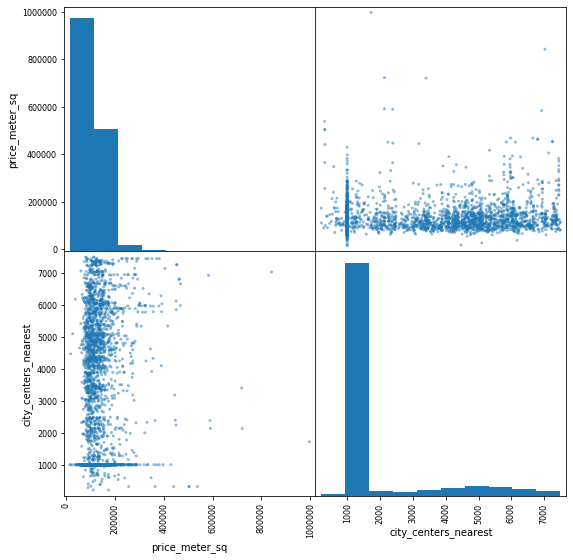

In [ ]:
pd.plotting.scatter_matrix(spb_data_centr[['price_meter_sq', 'city_centers_nearest']], figsize=(9, 9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb592009950>,
      dtype=object)

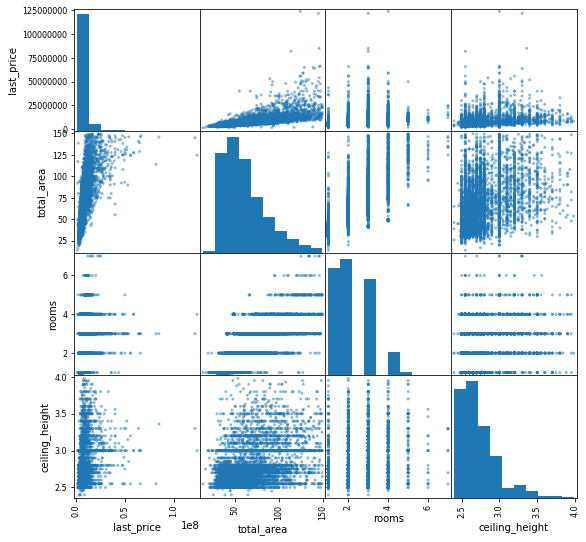

In [ ]:
pd.plotting.scatter_matrix(spb_data_centr[['last_price', 'total_area',
                                           'rooms', 'ceiling_height']], figsize=(9, 9))

По графику можно сказать что корреляция между ценой и удалённостью от центра очень слабая. Различий между центром Питера и общими данными в целом не обнаружил.

## Общий вывод

В результате работы с данными можно сделать вывод что ошибок и неправдоподобных значений довольно много. Часть из них возможно связана с ошибками ввода, часть с некорректной подачей объявлений и часть с особенностями рынка недвижимости, где цены и прараметры имеют очень сильный разброс. После отбрасывания неправдоподобных и малочисленных данных можно сказать что единственная надёжная корреляция это между ценой и площадью квартиры. Небольшая связь существует у цены и годом подачи объявления и у цены и расстояния от центра. Эти корреляции работают и для центра Питера и для всей базы квартир в целом. Так же немного отличаются цены в зависимости от этажа.